In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mytorch.data import load_data
from mytorch.models import Model,LinearModel,LogisticRegression,DenseNetwork
from mytorch.optimizers import Optimizer
from mytorch.report import Report

## case 1

In [2]:

d1 = load_data.text_data('data/linear.txt')


In [3]:
x1 = d1[:, :-1]  
y1 = d1[:, -1]
X_train, X_val, X_test, y_train, y_val, y_test = load_data.split_data(x1, y1)
input_dim = X_train.shape[1]

In [4]:
m1 = LinearModel(input_dim,1)
opt1 = Optimizer(m1, loss_type='mse',learning_rate= 0.01)

Mean Squared Error (MSE): 3.6746
R-squared (R2): 0.9666


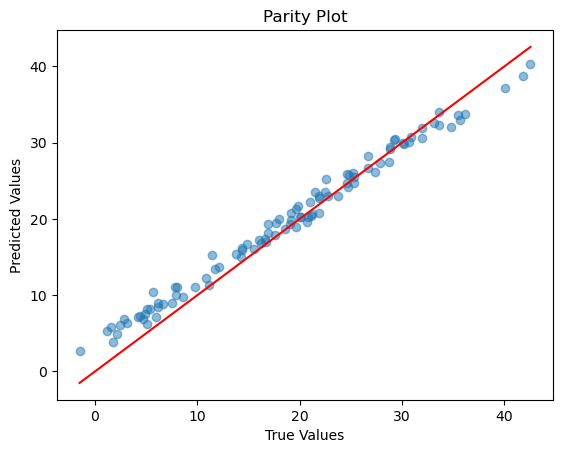

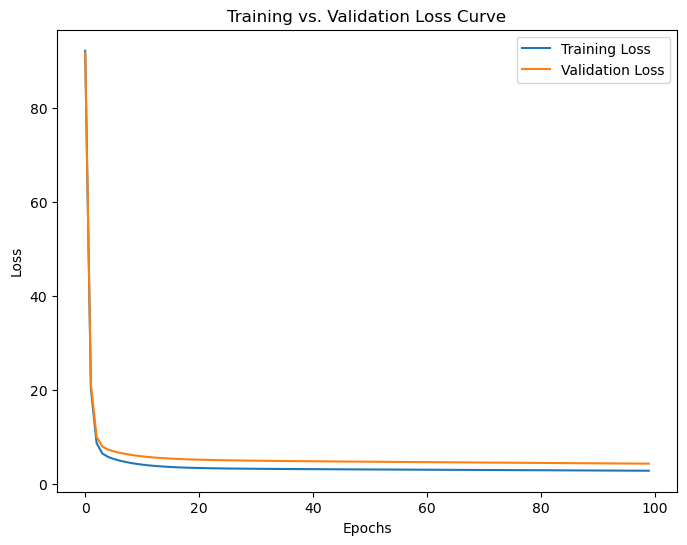

In [5]:
epochs = 100 #for simple- can raise more
train_losses = []
val_losses = []

for epoch in range(epochs):
    # train step
    opt1.step(X_train, y_train)
    train_loss = opt1.loss_fn(m1.forward(X_train), y_train)
    val_loss = opt1.loss_fn(m1.forward(X_val), y_val)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
report = Report(m1, X_test, y_test, task='regression')

# print metrics
report.regression_metrics()

# plot parity plot
report.plot_parity()
report.plot_loss_curve(train_losses,val_losses)

## case 2

In [6]:
d2 = load_data.tabular_data('data/imdb/IMDB Dataset.csv')
d2['sentiment'] = d2['sentiment'].map({'positive': 1, 'negative': 0})
x2 = load_data.preprocess_text(d2["review"].astype(str), one_hot_encode=True)
y2 = d2["sentiment"].values


In [7]:

x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = load_data.split_data(x2, y2)


In [8]:
m2 = LogisticRegression(input_dim = x_train2.shape[1],output_dim = 1)
opt2 = Optimizer(m2, loss_type='bce',learning_rate= 0.01)


In [9]:
epochs2 = 10 #just testing- can raise much more 1000~
train_losses2, val_losses2 = [], []

for epoch in range(epochs2):
    opt2.step(x_train2, y_train2)  
    # Compute training loss
    y_train_pred2 = m2.forward(x_train2)
    train_loss2 = opt2.loss_fn(y_train_pred2, y_train2)

    # Compute validation loss
    y_val_pred2 = m2.forward(x_val2)
    val_loss2 = opt2.loss_fn(y_val_pred2, y_val2)

    train_losses2.append(train_loss2)
    val_losses2.append(val_loss2)



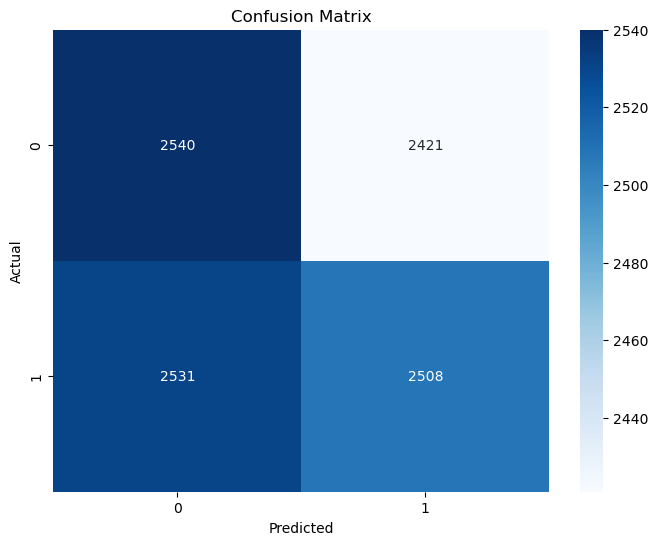

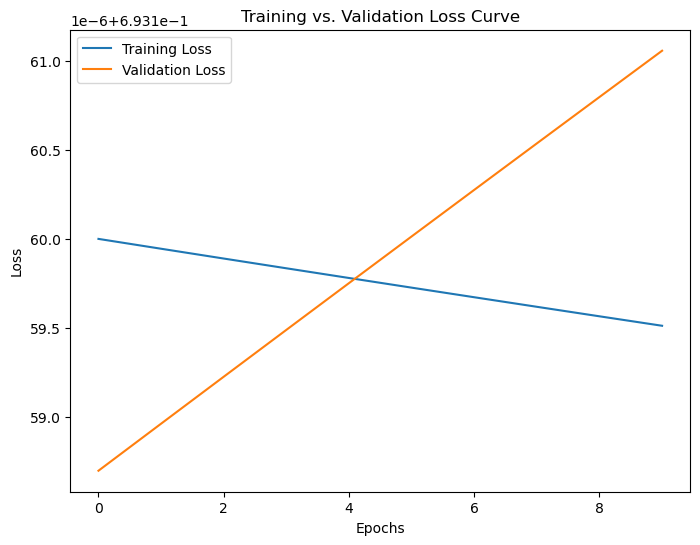

Accuracy: 0.5048
Precision: 0.5049
Recall: 0.5048
F1 Score: 0.5048

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      4961
           1       0.51      0.50      0.50      5039

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [10]:
report2 = Report(m2, x_test2, y_test2)
report2.plot_confusion_matrix()
report2.plot_loss_curve(train_losses2,val_losses2)
report2.classification_metrics()

## case 3

In [11]:
d3 = load_data.load_images('data/mnist.npz')

In [12]:
x_train3 = d3["X_train"]
y_train3 = d3["y_train"]

x_train3 = x_train3.astype("float")/255 #normalize 
x_train3 = x_train3.reshape(x_train3.shape[0], -1)
x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = load_data.split_data(x_train3, y_train3)

In [13]:

input_dim = 784  # Flattened image size
hidden_dim = 128  # Number of hidden neurons
output_dim = 10  # 10 digit classes

m3 = DenseNetwork(input_dim, hidden_dim, output_dim)
opt3 = Optimizer(m3, learning_rate=0.01)

In [14]:
num_epochs3 = 50 #just for testing can raise more
train_losses3 = []
val_losses3 = []

for epoch in range(num_epochs3):
    # Forward pass
    y_pred_train3 = m3.forward(x_train3)

    # Compute loss
    train_loss3 = opt3.loss_fn(y_pred_train3, y_train3)
    train_losses3.append(train_loss3)

    # Optimization step
    opt3.step(x_train3, y_train3)

    # Validation loss
    y_pred_val3 = m3.forward(x_val3)
    val_loss3 = opt3.loss_fn(y_pred_val3, y_val3)
    val_losses3.append(val_loss3)

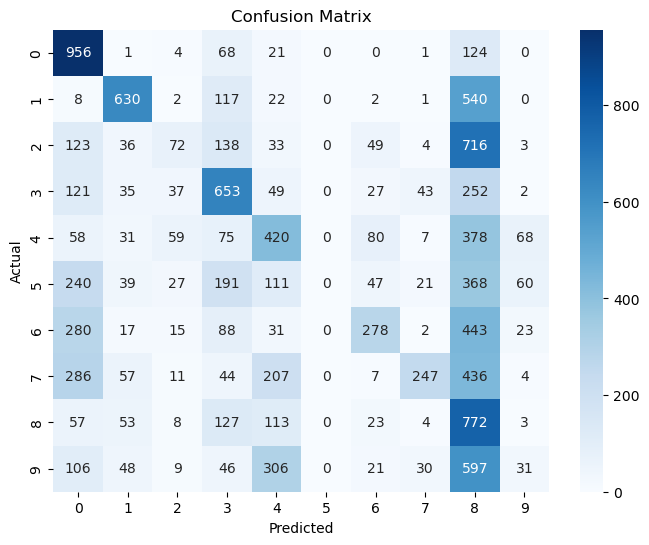

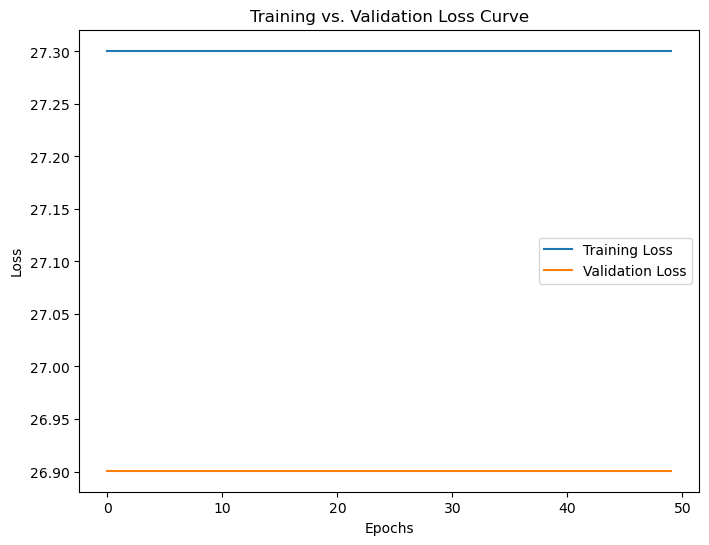

Accuracy: 0.3382
Precision: 0.3756
Recall: 0.3382
F1 Score: 0.3014

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.81      0.56      1175
           1       0.67      0.48      0.56      1322
           2       0.30      0.06      0.10      1174
           3       0.42      0.54      0.47      1219
           4       0.32      0.36      0.34      1176
           5       0.00      0.00      0.00      1104
           6       0.52      0.24      0.32      1177
           7       0.69      0.19      0.30      1299
           8       0.17      0.67      0.27      1160
           9       0.16      0.03      0.04      1194

    accuracy                           0.34     12000
   macro avg       0.37      0.34      0.30     12000
weighted avg       0.38      0.34      0.30     12000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [15]:
report3 = Report(m3, x_test3, y_test3)
report3.plot_confusion_matrix()
report3.plot_loss_curve(train_losses3,val_losses3)
report3.classification_metrics()